In [23]:
import menzalib as mz
import numpy as np
import pylab as pl
import scipy.optimize
%matplotlib qt

def f(x, a, b): return a*x+b

y1 = np.array([28.5, 44.5, 58])
y2 = np.array([22.5, 32.5, 39])
y3 = np.array([25.5, 46.5, 68.5])
y = (y1+y2+y3)/3
dy = np.std([y1, y2, y3], axis=0)/np.sqrt(3)
print(y, dy)
x = np.array([2,3])
y = np.ediff1d(y)
dy = [dy[1]+dy[0], dy[2]+dy[1]]

popt, pcov = scipy.optimize.curve_fit(f, x, y, sigma=dy, absolute_sigma=True)
print(f(0.5, *popt), np.sqrt(pcov))

[25.5        41.16666667 55.16666667] [1.41421356 3.56941742 7.04877189]
18.16666666666666 [[11.72955707         nan]
 [        nan 25.97138602]]


C:\Users\ilari\Anaconda3\lib\site-packages\ipykernel_launcher.py:20: RuntimeWarning: invalid value encountered in sqrt


In [3]:
pl.figure()
pl.xlabel("Numero banda")
pl.ylabel("U$_A$")
pl.errorbar(x, y, dy, fmt='o', label="Misure")
pl.plot(x, f(x, *popt), label="Fit")
pl.legend()
pl.show()

In [3]:
UE, dUE = [8.5, 7.3, 2.2, 0.8], [0.1, 0.1, 0.1, 0.1]
max1 = [1.92, 1.84, 1.84, 1.84]
min1 = [2.64, 2.56, 2.08, 1.92]
max2 = [3.68, 3.60, 3.52, 0.]
min2 = [4.40, 4.32, 3.76, 0.]
max3 = [5.68, 5.68, 0., 0.]
min3 = [6.48, 6.24, 0., 0.]
max4 = [7.84, 0., 0., 0.]

a = mz.dVosc(np.concatenate([max1, min1, max2, min2, max3, min3, max4]))
dmax1, dmin1, dmax2, dmin2, dmax3, dmin3, dmax4 = a[0:4], a[4:8], a[8:12], a[12:16], a[16:20], a[20:24], a[24:28]

a = np.array([UE, max1, min1, max2, min2, max3, min3, max4])
da = np.array([dUE, dmax1, dmin1, dmax2, dmin2, dmax3, dmin3, dmax4])

#mz.mat_tex(mz.ne_tex(a, da), titolo="U\ped{E} & max1 & min1 & max2 & min2 & max3 & min3 & max4")

In [36]:
x = a[0, ::-1]-9
pl.figure()
pl.xlabel("U$_E$ [V]")
pl.ylabel("U$_A$ [V]")
pl.errorbar(x, a[1], fmt="s", label="max1")
pl.errorbar(x, a[2], fmt="d", label="min1")
pl.errorbar(x[:3], a[3, :3], fmt="^", label="max2")
pl.errorbar(x[:3], a[4, :3], fmt="o", label="min2")
pl.legend()
pl.show()

[[ 0.04947865 -0.1224917 ]
 [-0.1224917   0.32722095]]
14.490524919424898 0.6832512828301709


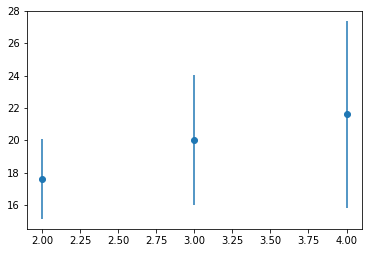

In [13]:
def f(x,a,b):
    return a*x+b

min1, min2 = a[:,0][1::2], a[:,0][1::2]
dmin1, dmin2 = mz.dVosc(min1)*10, mz.dVosc(min2)*10
min1, min2 = min1*10, min2*10
x=np.array([2,3,4])
y=np.ediff1d(min2)
dy=[dmin2[1]+dmin2[0], dmin2[2]+dmin2[1], dmin2[3]+dmin2[2]]

popt, pcov, dpopt, _, _ = mz.curve_fitdx(f, x, y, dy=dy, chi2pval=True)
print(f(0.5, *popt), df(0.5, *popt, *dpopt))
pl.errorbar(x,y, dy, fmt='o')
pl.show()

In [43]:
def f(x,a,b):
    return a*x+b

min1, min2 = a[:,0][1::2], a[:,0][1::2]
dmin1, dmin2 = mz.dVosc(min1)*10, mz.dVosc(min2)*10
min1, min2 = min1*10, min2*10
x=np.array([2,3,4])
y=np.ediff1d(min2)
dy=[dmin2[1]+dmin2[0], dmin2[2]+dmin2[1], dmin2[3]+dmin2[2]]
dy = mz.dVosc(y)

popt, pcov, dpopt, _, _ = mz.curve_fitdx(f, x, y, dy=dy, chi2pval=True)
cov = np.zeros((3,3))
cov[1:, 1:] = pcov
print(cov)
df = mz.dy(f, (0.5, *popt), cov)
print(f(0.5, *popt), df)

t = np.linspace(0, 4, 10)
pl.figure()
pl.xlabel("ordine n")
pl.ylabel("$\Delta$E [V]")
pl.errorbar(x,y, dy, fmt='.', label="Misure $\Delta$E")
pl.plot(t, f(t, *popt), label="Fit")
pl.plot([0.5, 0.5], [13.5, 18])
pl.plot([0.5], f(0.5,*popt), 'x', markersize="11", label="punto n=0.5")
pl.legend()
pl.show()

[[ 0.          0.          0.        ]
 [ 0.          0.05221288 -0.15155544]
 [ 0.         -0.15155544  0.47471454]]
14.684110784610652 0.33621232153158576


In [44]:
print(mz.ne_tex(popt, dpopt))

['$2.0$ $\\pm$ $0.2$' '$13.7$ $\\pm$ $0.7$']
